In [33]:
import cv2
import numpy as np
import pdb
import os
import math

In [2]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from matplotlib.colors import hsv_to_rgb

In [3]:
def image_print(img):
	"""
	Helper function to print out images, for debugging. Pass them in as a list.
	Press any key to continue.
	"""
	cv2.imshow("image", img)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

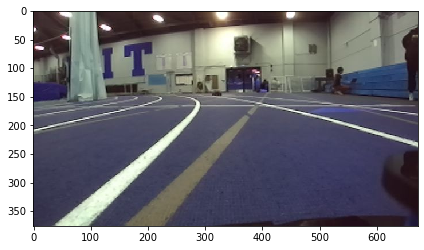

In [20]:
img1 = cv2.imread("track_img/c2.png")
imshow(img1)
# cv2.imshow('image',img1)

In [7]:
img1.shape

(376, 672, 3)

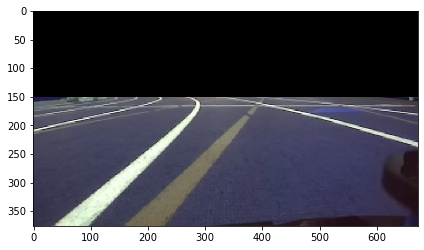

In [21]:
#line following box 
start_point1 = (0, 0) #top rectangle 
end_point1 = (676, 150) #top rectangle: just edit y_coordinate for line_follower

thickness = -1 
color = (0, 0, 0) # Black color in BGR
img_line= cv2.rectangle(img1, start_point1, end_point1, color, thickness)

# start_point2 = (0, 300) #bottom rectangle: just edit y_coordinate for line follower
# end_point2 = (672, 376) #bottom rectangle 
# img_line= cv2.rectangle(img_line, start_point2, end_point2, color, thickness)
imshow(img_line)
img1 = img_line

In [22]:
img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(img_hsv)
# image_print(img_hsv)

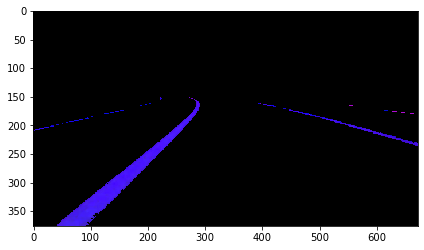

In [23]:
img_hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

lower_white = np.array([0,0,200])
upper_white = np.array([179,255,255])
  
mask = cv2.inRange(img_hsv, lower_white, upper_white)  
masked_img = cv2.bitwise_and(img_hsv, img_hsv, mask=mask).astype('uint8')
imshow(masked_img)

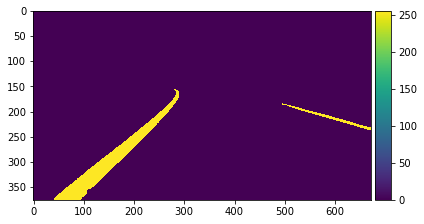

In [39]:
hsv_image = masked_img#cv2.cvtColor(img_masked2, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_image)

ret, th1 = cv2.threshold(h,180,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((1,1), dtype = "uint8")/9
bilateral = cv2.bilateralFilter(th1, 9 , 75, 75)
erosion = cv2.erode(bilateral, kernel, iterations = 1)

#finding the area of all connected white pixels in the image
pixel_components, output, stats, centroids =cv2.connectedComponentsWithStats(erosion, connectivity=8)

area = stats[1:, -1]; pixel_components = pixel_components - 1

min_size = 50

img2 = np.zeros((output.shape))

#Removing the small white pixel area below the minimum size
for i in range(0, pixel_components):
    if area[i] >= min_size:
        img2[output == i + 1] = 255
        
# img3 = img2.astype(np.uint8) 
# # find contours in the thresholded image
# cnts, _ = cv2.findContours(img3.copy(), cv2.RETR_TREE,
#                         cv2.CHAIN_APPROX_SIMPLE)

# img_ma = img_dilation.copy()
# img_ma = cv2.drawContours(img_ma,cnts[0],0,(0,255,255),2)

# rect = cv2.boundingRect(cnts[0])
# x,y,w,h = rect
# img_ma = cv2.rectangle(img1, (x,y),(x+w,y+h),(0,255,0),2)

imshow(img2)

In [40]:
src = np.uint8(img2)
dst = cv2.Canny(src, 50, 200, None, 3)
    
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

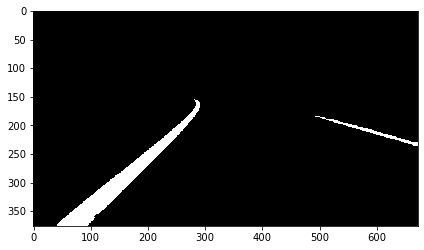

In [43]:
imshow(src)

Detected Lines (in red) - Standard Hough Line Transform


/Applications/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


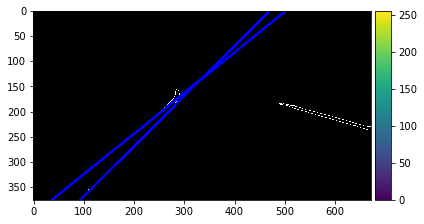

In [44]:
print("Detected Lines (in red) - Standard Hough Line Transform")
imshow(cdst)

Detected Lines (in red) - Probabilistic Line Transform


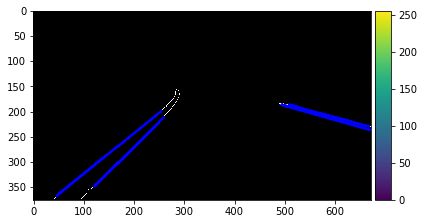

In [45]:
print("Detected Lines (in red) - Probabilistic Line Transform")
imshow(cdstP)

In [35]:
def white_color_segmentation(img, template):
    """
  Implement the cone detection using color segmentation algorithm
  Input:
    img: np.3darray; the input image with a cone to be detected. BGR.
    template_file_path; Not required, but can optionally be used to automate setting hue filter values.
  Return:
    bbox: ((x1, y1), (x2, y2)); the bounding box of the cone, unit in px
        (x1, y1) is the top left of the bbox and (x2, y2) is the bottom right of the bbox
    """
    ########## YOUR CODE STARTS HERE ##########
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # sensitivity = 15
    # lower_white = np.array([0,0,255-sensitivity])
    # upper_white = np.array([255,sensitivity,255])

    lower_white = np.array([0,0,200])
    upper_white = np.array([179,255,255])
  
    mask = cv2.inRange(img_hsv, upper_white, lower_white)
    masked_img = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
    imshow(masked_img)
    return masked_img
    
#     #bounding box
#     h, s, v = cv2.split(masked_img)
#     ret, th1 = cv2.threshold(h,180,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     kernel = np.ones((1,1), dtype = "uint8")/9
#     bilateral = cv2.bilateralFilter(th1, 9 , 75, 75)
#     erosion = cv2.erode(bilateral, kernel, iterations = 1)
    
    
#     #finding the area of all connected white pixels in the image
#     pixel_components, output, stats, centroids =cv2.connectedComponentsWithStats(erosion, connectivity=8)
#     area = stats[1:, -1]; pixel_components = pixel_components - 1
#     min_size = 50#500 #1000

#     img2 = np.zeros((output.shape))
#     #Removing the small white pixel area below the minimum size
#     for i in range(0, pixel_components):
#         if area[i] >= min_size:
#             img2[output == i + 1] = 255

#     img3 = masked_img.astype(np.uint8) 
   
#     # find contours and bounding rectangle in the thresholded image
#     try: 
#         cnts, _ = cv2.findContours(img3.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
#         rect = cv2.boundingRect(cnts[0])
#         x,y,w,h = rect #(x,y) be the top-left coordinate of the rectangle and (w,h) be its width and height.

#         #visualize
#         img_final = img.copy()
#         #img_final = cv2.drawContours(img_final,cnts[0],0,(0,255,255),2)
#         img_final = cv2.rectangle(img_final, (x,y),(x+w,y+h),(0,255,0),2)
#         #image_print(img_final)
#         imshow(img_final)
        
#         print("success")
#         return img_final

#     except:
#         x,y,w,h = 0,0,0,0

#     bounding_box = ((x,y),(x+w,y+h))

#     ########### YOUR CODE ENDS HERE ###########

#     # Return bounding box
#     return masked_img#bounding_box

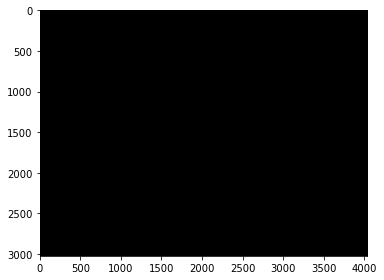

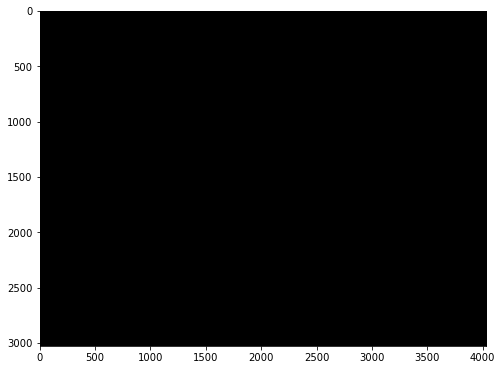

In [36]:
#  f = "/content/drive/MyDrive/classes/spring 23/RSS S23 Group 6/Lab 4/"+"start_area.jpg"
# img1 = cv2.imread(f)
final_img = white_color_segmentation(img1, '')
imshow(final_img)
red = final_img[:,:,0]
green = final_img[:,:,1]
blue = final_img[:,:,2]

fig, ax = plt.subplots(1, 1, figsize=(8, 48))
img_bgr = np.dstack((blue, green, red))
# ax.imshow(img_bgr)
ax.imshow(final_img)
# ax.set_title(f)